# <center>_Visualizing Data in Football_<center>
    
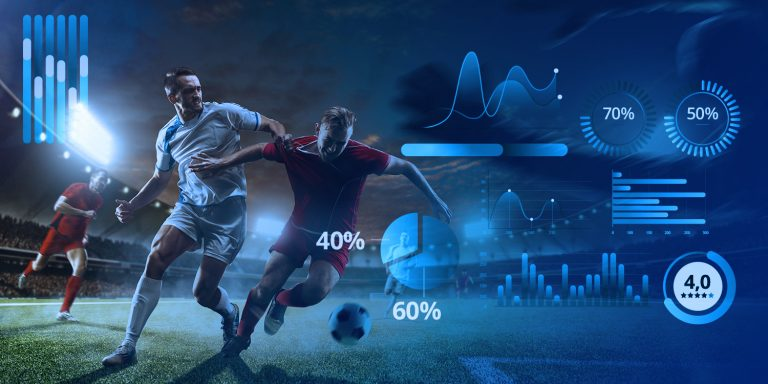

***Over the past two decades, the influence of data analytics has been growing in every aspect of our lives: in businesses of every kind, but also in healthcare, media and sports. Until a few years ago, football was thought to be immune from this trend. Now, the early adopters in the major football leagues are thriving thanks to the competitive advantage that investments in data analytics are beginning to provide them: Liverpool, AZ Alkmaar and Brentford are just a few in the fast-growing list of successful case studies. In our view, the clubs that aren’t planning to jump on the analytics bandwagon run the risk of being left behind.***

***Data is applied to football in three key areas: performance analysis, recruitment and strategy. We will be scraping the bottom of the barrel in our analysis which will be carried out with help of basic python and some libraries.This is a good place to start off with before moving onto the more complicated analysis.***

We get our [*dataset*](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017) from [*Kaggle*](https://www.kaggle.com/). This dataset contains data of international football matches that have been played since the year 1872 up till the present (2022). The dat has been split inot two csv files:

- results.csv - results of all international matches that have been played till date
- shootouts.csv - results of all shootouts that have been played till date

We will be using the following libraries in Python to carry out our analysis : 
- **Numpy** : it is used to perform a wide variety of mathematical operations on arrays
- **Pandas** : it is built off of Numpy and is used for data analysis and associated manipulation of tabular data in Dataframes
- **Matplotlib** : it is a comprehensive library for creating static, animated, and interactive visualisations in Python
- **Seaborn** : it is built on top of Matplotlib and is used for making even more dynamic and statistical graphs in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the CSV files

results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')

In [3]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,2,0,FIFA World Cup qualification,Mexico City,Mexico,False
43417,2022-03-30,Costa Rica,United States,2,0,FIFA World Cup qualification,San José,Costa Rica,False
43418,2022-03-30,Panama,Canada,1,0,FIFA World Cup qualification,Panama City,Panama,False
43419,2022-03-30,Jamaica,Honduras,2,1,FIFA World Cup qualification,Kingston,Jamaica,False


In [4]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43421 entries, 0 to 43420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43421 non-null  object
 1   home_team   43421 non-null  object
 2   away_team   43421 non-null  object
 3   home_score  43421 non-null  int64 
 4   away_score  43421 non-null  int64 
 5   tournament  43421 non-null  object
 6   city        43421 non-null  object
 7   country     43421 non-null  object
 8   neutral     43421 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [5]:
shootouts

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia
...,...,...,...,...
452,2022-01-26,Mali,Equatorial Guinea,Equatorial Guinea
453,2022-02-03,Cameroon,Egypt,Egypt
454,2022-02-05,Cameroon,Burkina Faso,Cameroon
455,2022-02-06,Senegal,Egypt,Senegal


In [6]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       457 non-null    object
 1   home_team  457 non-null    object
 2   away_team  457 non-null    object
 3   winner     457 non-null    object
dtypes: object(4)
memory usage: 14.4+ KB


## _Data Preparation and Cleaning_

***Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data. Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making.***

Adding a new column in the shootouts dataframe which will come in handy post-merging

In [7]:
shootouts['shootout'] = True

Merging both the dataframes to combine shooutout results

In [8]:
rs = pd.merge(results, shootouts, how = 'outer', on = ['date', 'home_team', 'away_team'])

In [9]:
rs

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,shootout
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,NaN,NaN
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,NaN,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43418,2022-03-30,Panama,Canada,1.0,0.0,FIFA World Cup qualification,Panama City,Panama,False,NaN,NaN
43419,2022-03-30,Jamaica,Honduras,2.0,1.0,FIFA World Cup qualification,Kingston,Jamaica,False,NaN,NaN
43420,2022-03-30,Solomon Islands,New Zealand,0.0,5.0,FIFA World Cup qualification,Doha,Qatar,True,NaN,NaN
43421,2009-10-28,South Africa,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,True


Dropping the last two rows as it has a lot of missing data and is irrelevant to our theory that we are testing

In [10]:
rs.drop([43421, 43422], inplace = True)
rs

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,shootout
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,NaN,NaN
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,NaN,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,2.0,0.0,FIFA World Cup qualification,Mexico City,Mexico,False,NaN,NaN
43417,2022-03-30,Costa Rica,United States,2.0,0.0,FIFA World Cup qualification,San José,Costa Rica,False,NaN,NaN
43418,2022-03-30,Panama,Canada,1.0,0.0,FIFA World Cup qualification,Panama City,Panama,False,NaN,NaN
43419,2022-03-30,Jamaica,Honduras,2.0,1.0,FIFA World Cup qualification,Kingston,Jamaica,False,NaN,NaN


Renaming columns for consistency

In [11]:
rs.rename(columns = {'date':'Date',
                     'home_team':'Home Team',
                     'away_team':'Away Team',
                     'home_score':'Home Score',
                     'away_score':'Away Score',
                     'tournament':'Tournament',
                     'city':'City',
                     'country':'Country',
                     'neutral':'Neutral Venue',
                     'winner':'Winning Team',
                     'shootout':'Shootout'
                     }, inplace = True)

Changing date format from 'object' to 'datetime' and then adding an extra column 'Year' for more accurate analysis

In [12]:
# changing date format from 'object' to 'datetime'

rs['Date'] = pd.to_datetime(rs['Date'])

# adding a new column 'year' by splitting the 'date' column

rs['Year'] = pd.DatetimeIndex(rs['Date']).year

Creating a column that displays the outcome of the match

In [13]:
# winning team

rs.loc[rs['Home Score'] > rs['Away Score'], 'Winning Team'] = rs['Home Team']
rs.loc[rs['Home Score'] < rs['Away Score'], 'Winning Team'] = rs['Away Team']

# losing team

rs.loc[rs['Home Team']== rs['Winning Team'], 'Losing Team'] = rs['Away Team']
rs.loc[rs['Away Team'] == rs['Winning Team'], 'Losing Team'] = rs['Home Team']

Replacing NULL values wherever necessary

In [14]:
# cleaning NaN values

rs['Winning Team'].fillna('Draw', inplace = True)
rs['Shootout'].fillna(False, inplace = True)
rs['Losing Team'].fillna('Draw', inplace = True)

Correcting error(s) in the outcome of a game that was missing in the extracted data

In [15]:
rs.loc[rs.Date == '1976-03-14', 'Winning Team'] = 'Morocco'
rs.loc[rs.Date == '1976-03-14', 'Losing Team'] = 'Guinea'

Repositioning columns for better understanding

In [16]:
#repositioning columns for better understanding

year = rs.pop('Year')
rs.insert(0, 'Year', year)

shootout = rs.pop('Shootout')
rs.insert(6, 'Shootout', shootout)

In [17]:
rs

,Year,Date,Home Team,Away Team,Home Score,Away Score,Shootout,Tournament,City,Country,Neutral Venue,Winning Team,Losing Team
0,1872,1872-11-30,Scotland,England,0.0,0.0,False,Friendly,Glasgow,Scotland,False,Draw,Draw
1,1873,1873-03-08,England,Scotland,4.0,2.0,False,Friendly,London,England,False,England,Scotland
2,1874,1874-03-07,Scotland,England,2.0,1.0,False,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875,1875-03-06,England,Scotland,2.0,2.0,False,Friendly,London,England,False,Draw,Draw
4,1876,1876-03-04,Scotland,England,3.0,0.0,False,Friendly,Glasgow,Scotland,False,Scotland,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43416,2022,2022-03-30,Mexico,El Salvador,2.0,0.0,False,FIFA World Cup qualification,Mexico City,Mexico,False,Mexico,El Salvador
43417,2022,2022-03-30,Costa Rica,United States,2.0,0.0,False,FIFA World Cup qualification,San José,Costa Rica,False,Costa Rica,United States
43418,2022,2022-03-30,Panama,Canada,1.0,0.0,False,FIFA World Cup qualification,Panama City,Panama,False,Panama,Canada
43419,2022,2022-03-30,Jamaica,Honduras,2.0,1.0,False,FIFA World Cup qualification,Kingston,Jamaica,False,Jamaica,Honduras


## _Exploratory Analysis and  Visualization_

***We can define exploratory data analysis as the essential data investigation process before the formal analysis to spot patterns and anomalies, discover trends, and test hypotheses with summary statistics and visualizations. It gives an idea about the data we will be digging deep into while analyzing.***

- **Which team has scored the most number of goals?**

In [18]:
home_team = rs.groupby('Home Team')[['Home Score', 'Away Score']].sum()
away_team = rs.groupby('Away Team')[['Home Score', 'Away Score']].sum()

home_team.drop(['Canary Islands', 'Găgăuzia', 'Madrid', 'Niue', 'Republic of St. Pauli', 'Silesia'], inplace = True)
away_team.drop(['Asturias', 'Brunei Darussalam', 'Crimea', 'Two Sicilies'], inplace = True)

home_team.reset_index(inplace = True)
away_team.reset_index(inplace = True)

total_goals_scored = home_team['Home Score'] + away_team['Away Score']
total_goals_conceded = home_team['Away Score'] + away_team['Home Score']

countries = pd.DataFrame({
    'Team' : home_team['Home Team'],
    'Goals Scored' : total_goals_scored,
    'Goals Conceded' :total_goals_conceded
})
countries.columns = ['Team', 'Goals Scored', 'Goals Conceded']

total_goals = countries['Goals Scored'].idxmax()

countries.sort_values('Goals Scored', ascending = False, inplace = True)

print('{} has scored the most number of goals ({}) in the history of football'.format(countries['Team'][total_goals], countries['Goals Scored'][total_goals]))

England has scored the most number of goals (2278.0) in the history of football


- **What is the highest scoring match in the history of football?**

In [19]:
goals_scored = rs['Home Score'] + rs['Away Score']
rs.iloc[goals_scored.idxmax()].to_frame()

,23965
Year,2001
Date,2001-04-11 00:00:00
Home Team,Australia
Away Team,American Samoa
Home Score,31.0
Away Score,0.0
Shootout,False
Tournament,FIFA World Cup qualification
City,Coffs Harbour
Country,Australia


The highest scoring match in the history of football was between Australia and Samoa which was played during a FIFA World Cup qualification game back in 2001. The final score was 31-0 in favour of Australia.

- **Which team has scored the most number of goals in a single match?**

In [20]:
homescore_max = rs['Home Score'].max()
awayscore_max = rs['Away Score'].max()

if homescore_max > awayscore_max :
    score_max_index = rs['Home Score'].idxmax()
else :
    score_max_index = rs['Away Score'].idxmax()
    
rs.iloc[score_max_index].to_frame()

,23965
Year,2001
Date,2001-04-11 00:00:00
Home Team,Australia
Away Team,American Samoa
Home Score,31.0
Away Score,0.0
Shootout,False
Tournament,FIFA World Cup qualification
City,Coffs Harbour
Country,Australia


The most number of goals scored by a single team in a one-off match was Australia where they thrashed Samoa 31-0 in FIFA World Cup qualification game. This also happend to be the highest scoring game in the history of football and both the records remains untouched till date.

**Now let us analyze some trends from the following tournaments :**
- ***FIFA World Cup***
- ***Copa América***
- ***African Cup of Nations***
- ***UEFA Euro***

First, we create seperates dataframes for each tournament

In [21]:
#creating dataframes for major tournaments

world_cup = rs.loc[rs['Tournament'] == 'FIFA World Cup']
copa_america = rs.loc[rs['Tournament'] == 'Copa América']
afcon = rs.loc[rs['Tournament'] == 'African Cup of Nations']
euros = rs.loc[rs['Tournament'] == 'UEFA Euro']

- **How have the number of goals scored across various editions varied?**

In [22]:
# grouping dataframes with respect to the year and goals scored

world_cup_goals = world_cup.groupby('Year')[['Home Score', 'Away Score']].sum()
copa_america_goals = copa_america.groupby('Year')[['Home Score', 'Away Score']].sum()
afcon_goals = afcon.groupby('Year')[['Home Score', 'Away Score']].sum()
euros_goals = euros.groupby('Year')[['Home Score', 'Away Score']].sum()

world_cup_goals['Goals Scored'] = world_cup_goals['Home Score'] + world_cup_goals['Away Score']
copa_america_goals['Goals Scored'] = copa_america_goals['Home Score'] + copa_america_goals['Away Score']
afcon_goals['Goals Scored'] = afcon_goals['Home Score'] + afcon_goals['Away Score']
euros_goals['Goals Scored'] = euros_goals['Home Score'] + euros_goals['Away Score']

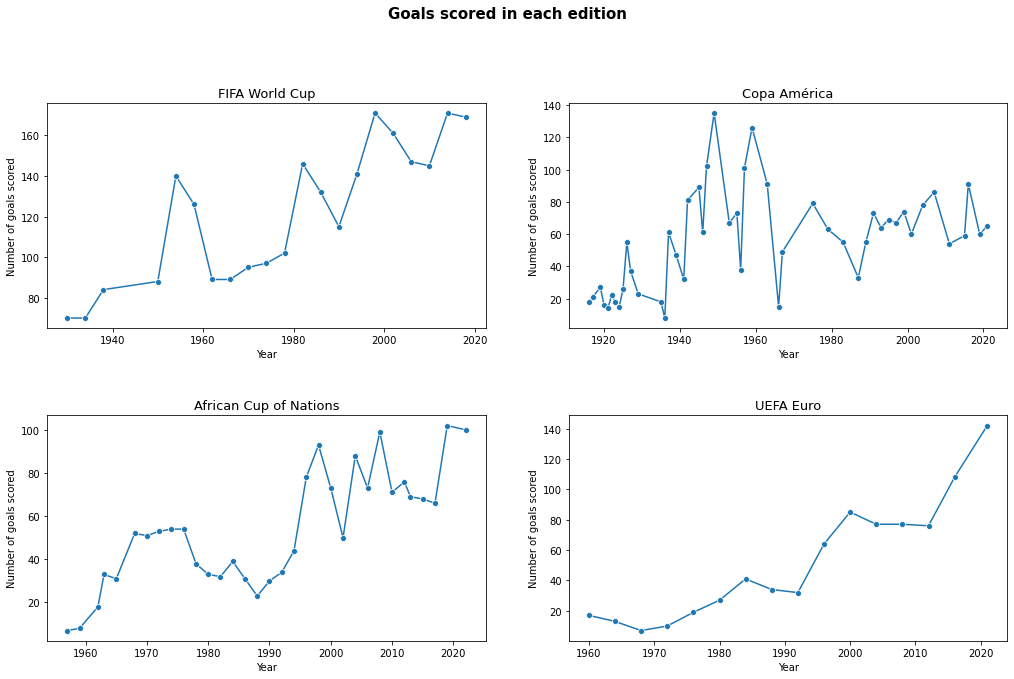

In [23]:
fig_goals, axs = plt.subplots(2,2, figsize=(15,10))

sns.lineplot(data = world_cup_goals, x = world_cup_goals.index, y = 'Goals Scored', ax = axs[0,0], marker='o')
sns.lineplot(data = copa_america_goals, x = copa_america_goals.index, y = 'Goals Scored', ax = axs[0,1], marker='o')
sns.lineplot(data = afcon_goals, x = afcon_goals.index, y = 'Goals Scored', ax = axs[1,0], marker='o')
sns.lineplot(data = euros_goals, x = euros_goals.index, y = 'Goals Scored', ax = axs[1,1], marker='o')

axs[0,0].set_xlabel('Year', fontsize = 10)
axs[0,1].set_xlabel('Year', fontsize = 10)
axs[1,0].set_xlabel('Year', fontsize = 10)
axs[1,1].set_xlabel('Year', fontsize = 10)

axs[0,0].set_ylabel('Number of goals scored', fontsize = 10)
axs[0,1].set_ylabel('Number of goals scored', fontsize = 10)
axs[1,0].set_ylabel('Number of goals scored', fontsize = 10)
axs[1,1].set_ylabel('Number of goals scored', fontsize = 10)

axs[0,0].set_title('FIFA World Cup', fontsize = 13)
axs[0,1].set_title('Copa América', fontsize = 13)
axs[1,0].set_title('African Cup of Nations', fontsize = 13)
axs[1,1].set_title('UEFA Euro', fontsize = 13)

plt.suptitle('Goals scored in each edition', fontweight ='bold', fontsize = 15)

fig_goals.tight_layout(pad = 4)

fig_goals.savefig('Goals scored in each edition.png')

We can see that there isn't a continuous growth/decline in the number of goals scored across different editions. This is mainly due to the evolution of formations over time and different styles of play being adopted.

- **How many teams have won the respective tournaments?**

In [24]:
#creating dataframes for finals of the respective tournaments

world_cup_groupby = world_cup.groupby('Year')
world_cup_final = world_cup_groupby.last()

copa_america_groupby = copa_america.groupby('Year')
copa_america_final = copa_america_groupby.last()

afcon_groupby = afcon.groupby('Year')
afcon_final = afcon_groupby.last()

euros_groupby = euros.groupby('Year')
euros_final = euros_groupby.last()

In [25]:
# resolving certain faults in the Finals data

indexNames = copa_america_final[copa_america_final['Winning Team'] == 'Draw'].index
copa_america_final.drop(indexNames, inplace = True)

In [26]:
# creating arrays to identify the winners and how many times they have won

world_cup_champions = world_cup_final['Winning Team'].value_counts().sort_index()
copa_america_champions = copa_america_final['Winning Team'].value_counts().sort_index()
afcon_champions = afcon_final['Winning Team'].value_counts().sort_index()
euros_champions = euros_final['Winning Team'].value_counts().sort_index()


world_cup_champions_count = world_cup_champions.array
world_cup_champions_teamnames = world_cup_champions.index.array

copa_america_champions_count = copa_america_champions.array
copa_america_champions_teamnames = copa_america_champions.index.array

afcon_champions_count = afcon_champions.array
afcon_champions_teamnames = afcon_champions.index.array

euros_champions_count = euros_champions.array
euros_champions_teamnames = euros_champions.index.array

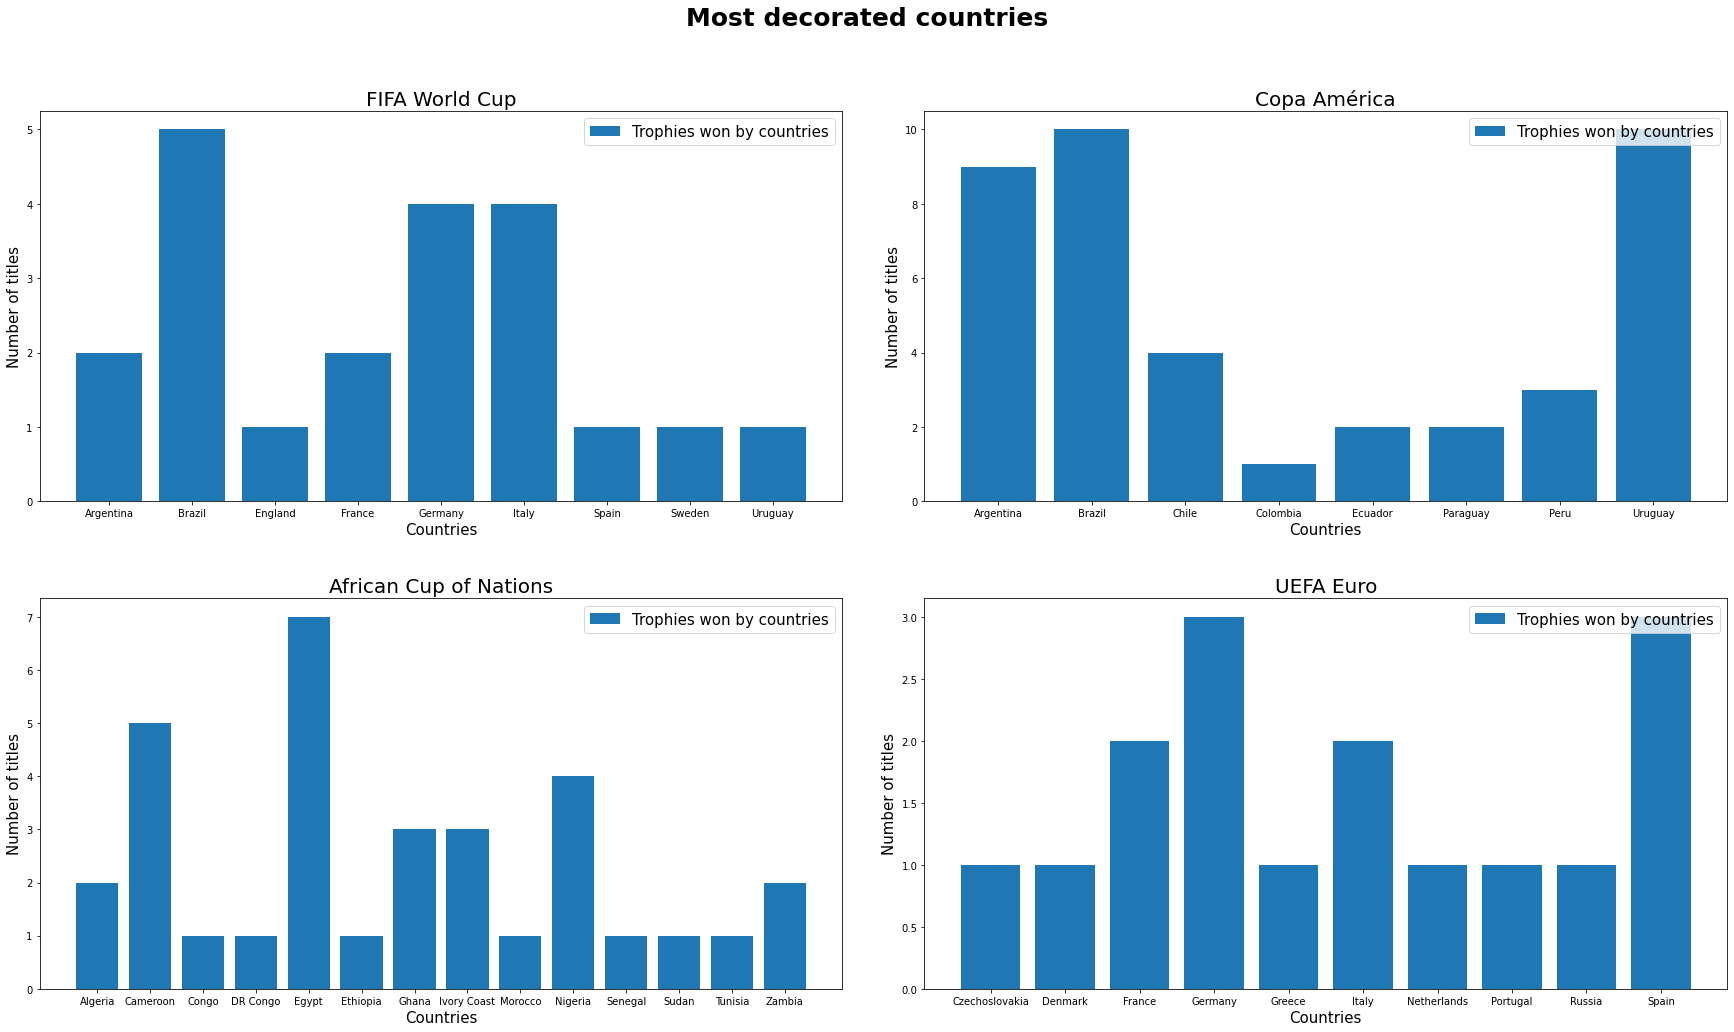

In [27]:
# plotting bar graphs to show the most successful countries in each tournament

fig_trophies, axs = plt.subplots(2,2, figsize=(25,15))

axs[0,0].bar(world_cup_champions_teamnames, world_cup_champions_count)
axs[0,1].bar(copa_america_champions_teamnames, copa_america_champions_count)
axs[1,0].bar(afcon_champions_teamnames, afcon_champions_count)
axs[1,1].bar(euros_champions_teamnames, euros_champions_count)

axs[0,0].legend(['Trophies won by countries'], fontsize = 15, loc = 'upper right')
axs[0,1].legend(['Trophies won by countries'], fontsize = 15, loc = 'upper right')
axs[1,0].legend(['Trophies won by countries'], fontsize = 15, loc = 'upper right')
axs[1,1].legend(['Trophies won by countries'], fontsize = 15, loc = 'upper right')

axs[0,0].set_xlabel('Countries', fontsize = 15)
axs[0,1].set_xlabel('Countries', fontsize = 15)
axs[1,0].set_xlabel('Countries', fontsize = 15)
axs[1,1].set_xlabel('Countries', fontsize = 15)

axs[0,0].set_ylabel('Number of titles', fontsize = 15)
axs[0,1].set_ylabel('Number of titles', fontsize = 15)
axs[1,0].set_ylabel('Number of titles', fontsize = 15)
axs[1,1].set_ylabel('Number of titles', fontsize = 15)

axs[0,0].set_title('FIFA World Cup', fontsize = 20)
axs[0,1].set_title('Copa América', fontsize = 20)
axs[1,0].set_title('African Cup of Nations', fontsize = 20)
axs[1,1].set_title('UEFA Euro', fontsize = 20)

plt.suptitle('Most decorated countries', fontweight ='bold', fontsize = 25)

fig_trophies.tight_layout(pad = 4)

fig_trophies.savefig('Most decorated countries.png')

**Brazil**, **Germany** and **Italy** have dominated both the International and the Continental tournaments, whilst countries such as **Egypt**, **Cameroon**, **Ghana**, **Ivory Coast**, **Nigeria**, **Spain**, **Argentina** and **Uruguay** have enjoyed quite a lot of Continental success.

Now let us take it one step further and see how many of these victors were hosts.

- **How many of these champions were hosts when they won the respective tournaments?**

In [28]:
# creating arrays to identify number of times a host as won a tournament 

world_cup_host_champions_count = [1,0,1,1,1,1,0,0,1]
copa_america_host_champions_count = [5,4,2,1,1,1,2,6]
afcon_host_champions_count = [1,0,0,0,2,1,1,0,0,1,0,1,1,0]
euros_host_champions_count = [0,0,1,0,0,1,0,0,0,1]

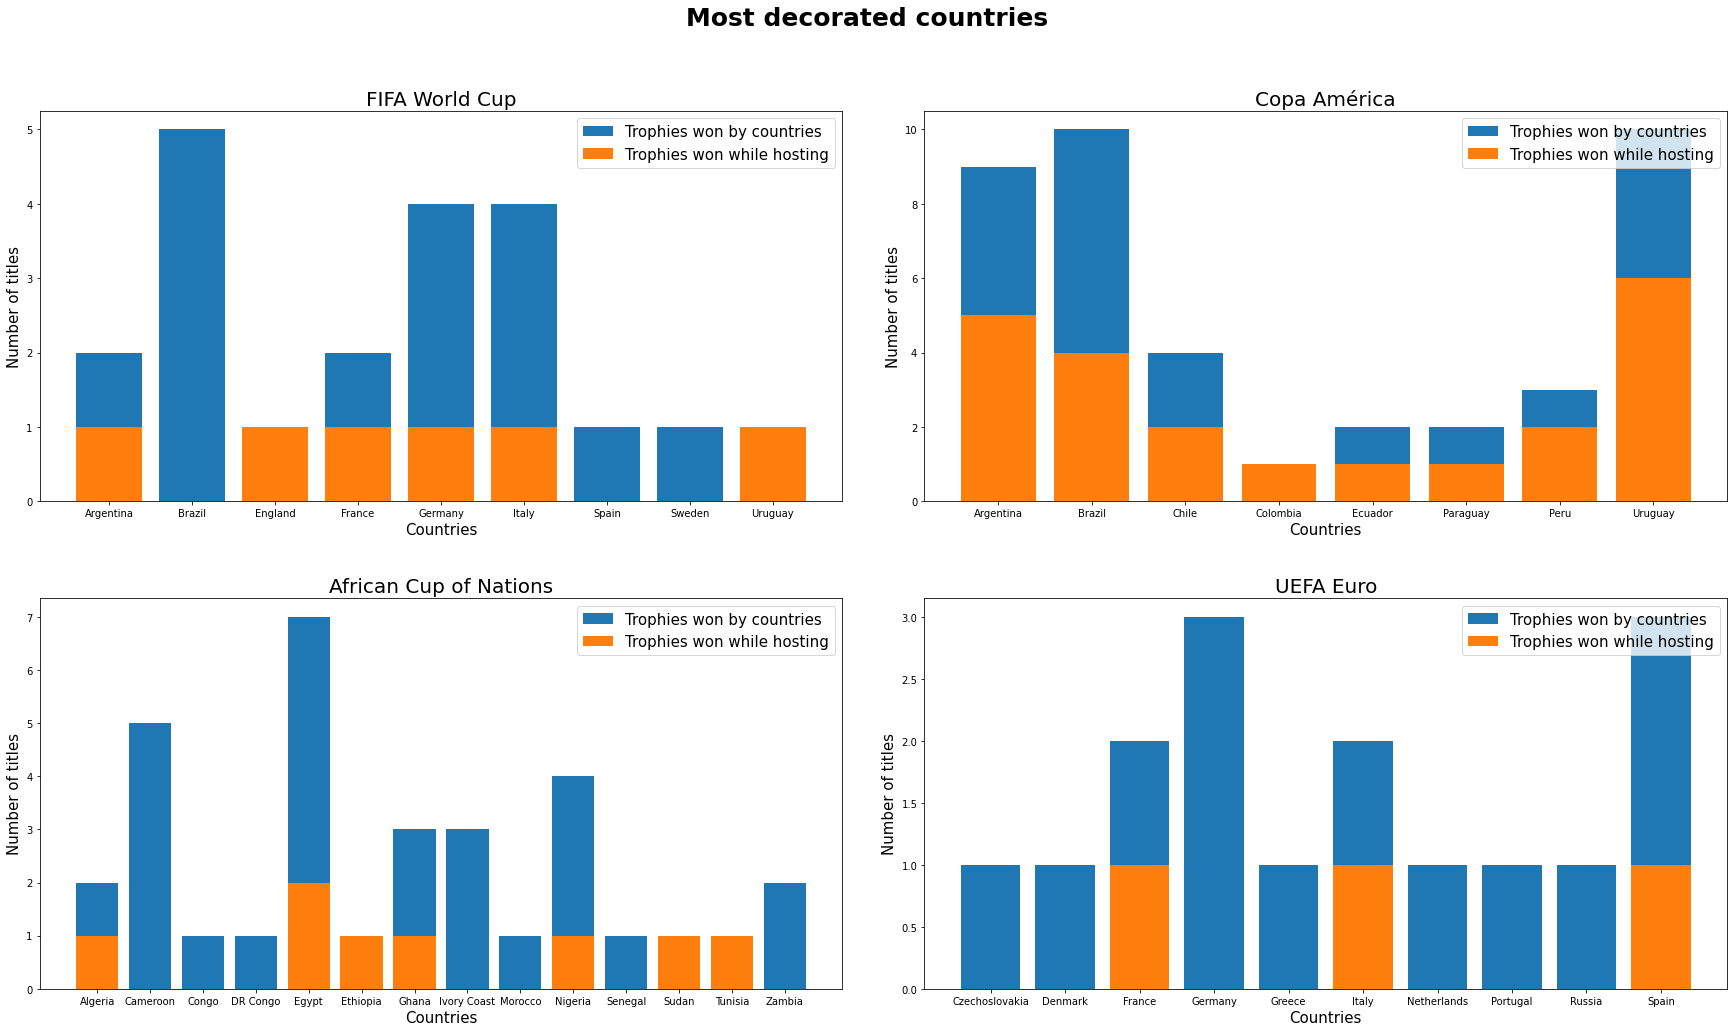

In [29]:
# plotting bar graphs to show the most successful home teams in tournaments

fig_host_trophies, axs = plt.subplots(2,2, figsize=(25,15))

axs[0,0].bar(world_cup_champions_teamnames, world_cup_champions_count)
axs[0,0].bar(world_cup_champions_teamnames, world_cup_host_champions_count)
axs[0,1].bar(copa_america_champions_teamnames, copa_america_champions_count)
axs[0,1].bar(copa_america_champions_teamnames, copa_america_host_champions_count)
axs[1,0].bar(afcon_champions_teamnames, afcon_champions_count)
axs[1,0].bar(afcon_champions_teamnames, afcon_host_champions_count)
axs[1,1].bar(euros_champions_teamnames, euros_champions_count)
axs[1,1].bar(euros_champions_teamnames, euros_host_champions_count)

axs[0,0].legend(['Trophies won by countries', 'Trophies won while hosting'], fontsize = 15, loc = 'upper right')
axs[0,1].legend(['Trophies won by countries', 'Trophies won while hosting'], fontsize = 15, loc = 'upper right')
axs[1,0].legend(['Trophies won by countries', 'Trophies won while hosting'], fontsize = 15, loc = 'upper right')
axs[1,1].legend(['Trophies won by countries', 'Trophies won while hosting'], fontsize = 15, loc = 'upper right')

axs[0,0].set_xlabel('Countries', fontsize = 15)
axs[0,1].set_xlabel('Countries', fontsize = 15)
axs[1,0].set_xlabel('Countries', fontsize = 15)
axs[1,1].set_xlabel('Countries', fontsize = 15)

axs[0,0].set_ylabel('Number of titles', fontsize = 15)
axs[0,1].set_ylabel('Number of titles', fontsize = 15)
axs[1,0].set_ylabel('Number of titles', fontsize = 15)
axs[1,1].set_ylabel('Number of titles', fontsize = 15)

axs[0,0].set_title('FIFA World Cup', fontsize = 20)
axs[0,1].set_title('Copa América', fontsize = 20)
axs[1,0].set_title('African Cup of Nations', fontsize = 20)
axs[1,1].set_title('UEFA Euro', fontsize = 20)

plt.suptitle('Most decorated countries', fontweight ='bold', fontsize = 25)

fig_host_trophies.tight_layout(pad = 4)

fig_host_trophies.savefig('Most successful host countries.png')

There have been a fair few victors who were hosts as well but there seem to be quite a lot that weren't necessaily hosting tournaments which they won, with _Copa América_ being an exception.

Let's get a more specific visualisation as to how often do we see _Host Nations_ come out on top.

- **What is the percentage of teams that have won the tournament whilst hosting it?**

In [30]:
# preparing necessary elements to draw a piechart

world_cup_neutral_champions_count = world_cup_champions_count - world_cup_host_champions_count
copa_america_neutral_champions_count =copa_america_champions_count - copa_america_host_champions_count
afcon_neutral_champions_count = afcon_champions_count - afcon_host_champions_count
euros_neutral_champions_count = euros_champions_count - euros_host_champions_count

world_cup_champions_arr = [sum(world_cup_neutral_champions_count), sum(world_cup_host_champions_count)]
copa_america_champions_arr = [sum(copa_america_neutral_champions_count), sum(copa_america_host_champions_count)]
afcon_champions_arr = [sum(afcon_neutral_champions_count), sum(afcon_host_champions_count)]
euros_champions_arr = [sum(euros_neutral_champions_count), sum(euros_host_champions_count)]

wp = {'edgecolor': 'black', 'linewidth': 2, 'antialiased': True}

tp = {'fontsize' : 15}

ex = (0.1, 0.0)

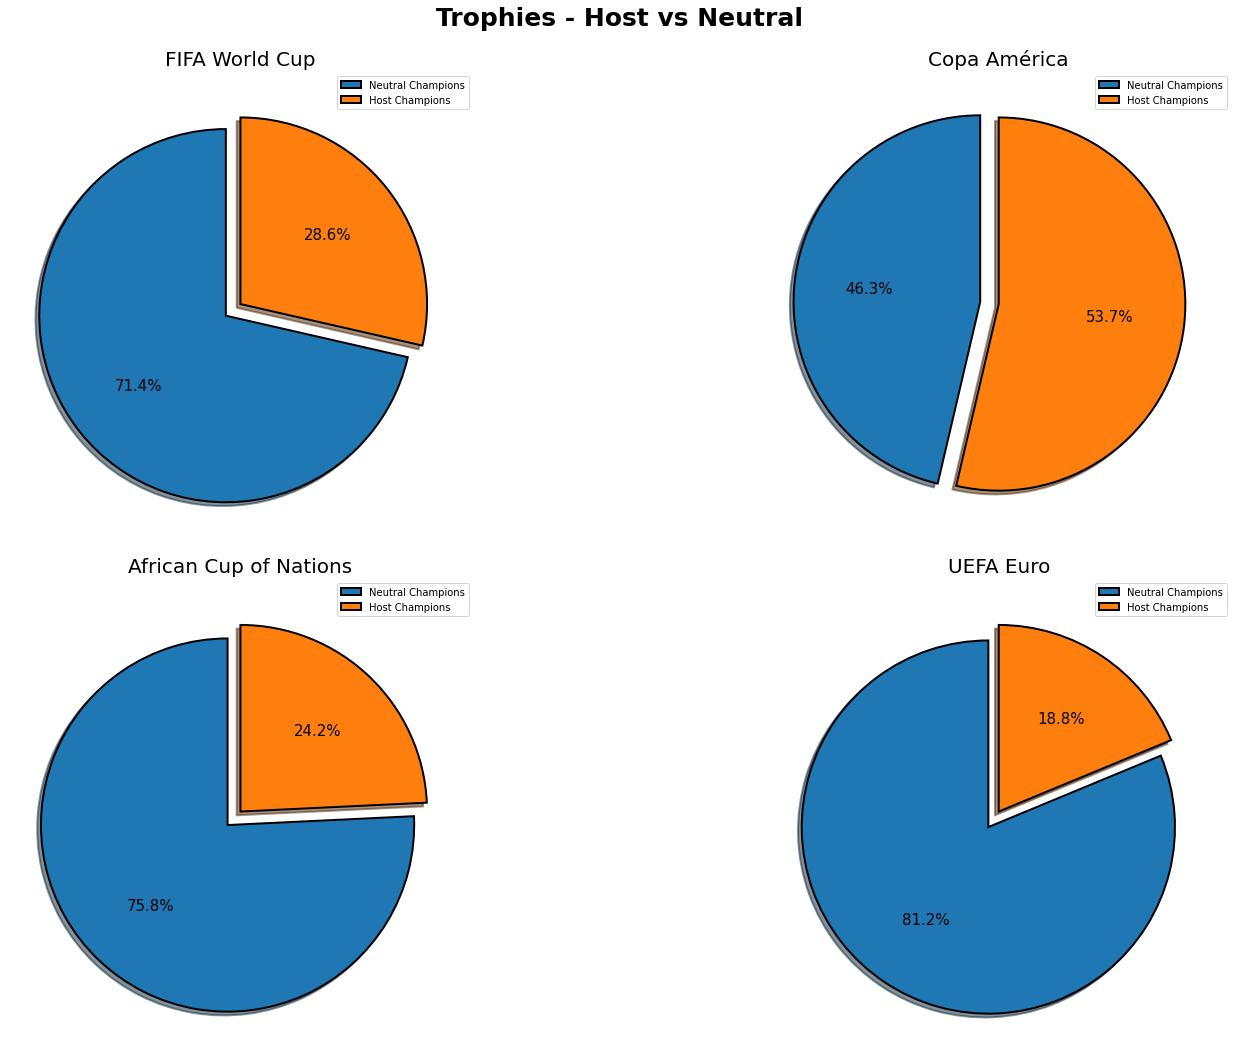

In [31]:
# plotting pie charts to show the difference in success percentage between host countries and neutral countries

fig_hostvsneutral_trophies, axs = plt.subplots(2,2, figsize=(25,15))

axs[0,0].pie(world_cup_champions_arr, autopct='%1.1f%%', startangle = 90, shadow = True, wedgeprops = wp, textprops = tp, explode = ex)
axs[0,1].pie(copa_america_champions_arr, autopct='%1.1f%%', startangle = 90, shadow = True, wedgeprops = wp, textprops = tp, explode = ex)
axs[1,0].pie(afcon_champions_arr, autopct='%1.1f%%', startangle = 90, shadow = True, wedgeprops = wp, textprops = tp, explode = ex)
axs[1,1].pie(euros_champions_arr, autopct='%1.1f%%', startangle = 90, shadow = True, wedgeprops = wp, textprops = tp, explode = ex)

axs[0,0].set_title('FIFA World Cup', fontsize = 20)
axs[0,1].set_title('Copa América', fontsize = 20)
axs[1,0].set_title('African Cup of Nations', fontsize = 20)
axs[1,1].set_title('UEFA Euro', fontsize = 20)

axs[0,0].legend(['Neutral Champions', 'Host Champions'])
axs[0,1].legend(['Neutral Champions', 'Host Champions'])
axs[1,0].legend(['Neutral Champions', 'Host Champions'])
axs[1,1].legend(['Neutral Champions', 'Host Champions'])

plt.suptitle('Trophies - Host vs Neutral', fontweight ='bold', fontsize = 25)

fig_hostvsneutral_trophies.tight_layout(pad = 2)

fig_hostvsneutral_trophies.savefig('Host vs Neutral success comparison.png')

Here we can see that **FIFA World Cup**, **African Cup of Nations** and **UEFA Euro** have a decent (but not so encouraging) win percentage whilst being the Home Team whereas in **Copa América** the Home Team seems to have a higher success rate.

## _Inferences and Conclusion_

We can conculde by saying that although being the Host Nation may hold an advantage, it doesn't necessarily guarantee 100% success. There is a lot of other data that can contribute to a team's result such as tactics, formation, team chemistry, etc.

## _References_

- The [*dataset*](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017) we used for our analysis was obtained from [*Kaggle*](https://www.kaggle.com/).
- To clean some of our data that we extracted from kaggle we cross-referenced it with the data availale on Wikipedia.

## _Future Work_

For our next project we will be analysing _formations_ as they play a major role in setting up a team's tactics. We will be analysing how formations have evolved over the years and how they impact a team's performance.

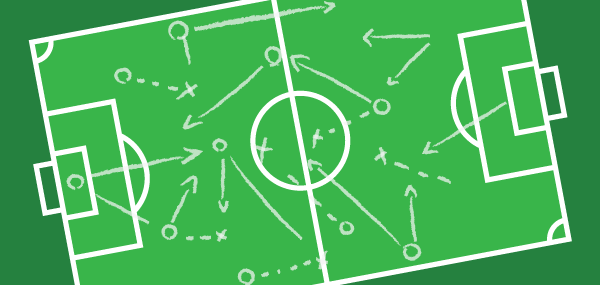